# CASE 04 -  Stock Price Prediction

Pada studi kasus ini, kamu akan berlatih melakukan pengembangan model yang dapat menebak harga 
saham dari data yang tersedia (misalnya ingin menebak harga saham dari mulai Januari 2016 - Desember 
2017, atau tahun 2017 saja). Kamu bisa lakukan modeling ANN menggunakan RNN!
Lebih lengkapnya, lakukanlah beberapa langkah berikut ini:
1. Lakukan import libraries & data, EDA dan juga preprocessing. Berikut ini beberapa tahapan:
- Import libraries & dataset
- Function preparation (prediction plot, RMSE evaluation, etc.)
- Missing values handling
- Splitting data training & testing
- Data plot visualization
- Feature scaling for data train
- Data structure & reshaping
2. Tentukan teknik RNN yang cocok untuk tahap modeling dan lakukan persiapan untuk data test
3. Jalankan prediction dan buat visualisasi data dari hasil test yang telah dilakukan
4. Berikan kesimpulan dan insight, serta evaluasi model yang kamu buat

## Langkah 1: Import Libraries & Data

In [52]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

In [53]:
# Import Dataset
data = pd.read_csv(r"C:\Users\Acer\Kelas Work_Project Data Science\Case Study 04\Netflix.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [54]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [55]:
# Informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB
None


## Langkah 2: Handling Missing Values  

In [56]:
# Cek nilai-nilai yang hilang
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Langkah 3: Split Data dan Visualisasi

In [67]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

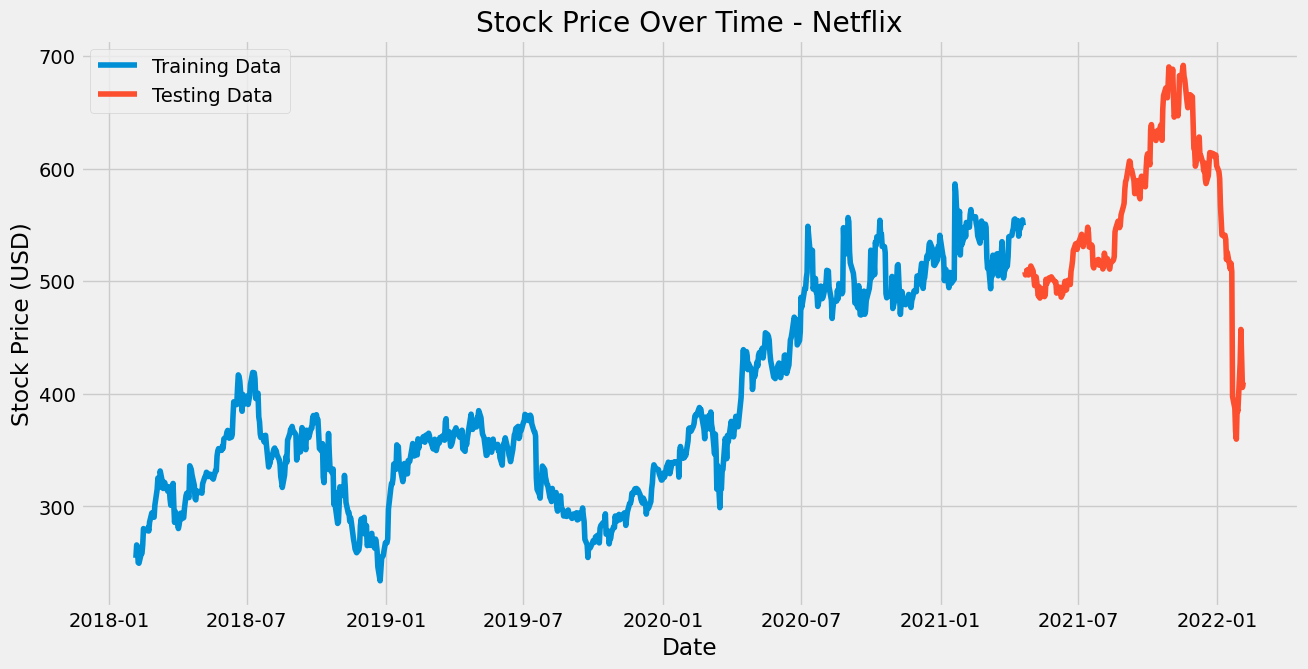

In [68]:
# Visualize stock prices with datetime on the x-axis
plt.figure(figsize=(14, 7))
plt.plot(train['Date'], train['Close'], label='Training Data')
plt.plot(test['Date'], test['Close'], label='Testing Data')
plt.title('Stock Price Over Time - Netflix')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

#### PENJELASAN
Grafik menunjukkan dua seri data yang diberi warna berbeda untuk membedakan antara data latihan dan data uji. Garis biru mencerminkan pergerakan harga saham pada data latihan, yang digunakan untuk melatih model. Sementara itu, garis merah mencerminkan pergerakan harga pada data uji yang tidak terlihat selama pelatihan.



## Langkah 4: Feature Scaling dan Reshaping 

In [69]:
# Feature scaling for the training set
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))

In [70]:
# Reshape data for the RNN model
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Langkah 5: Build RNN Model dan Persiapan Data Test 

In [71]:
# Build RNN model with LSTM layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [72]:
# Prepare test data
test_scaled = scaler.transform(test['Close'].values.reshape(-1, 1))
X_test, y_test = [], []
for i in range(60, len(test_scaled)):
    X_test.append(test_scaled[i-60:i, 0])
    y_test.append(test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Langkah 6: Train Model, Make Predictions, dan Visualisasi 

In [73]:
# Train the model
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
model.fit(X_train, y_train, epochs=20, batch_size=32, callbacks=[early_stop])

Epoch 1/20
24/24 [==============================] - 10s 84ms/step - loss: 0.0417
Epoch 2/20
24/24 [==============================] - 2s 99ms/step - loss: 0.0059
Epoch 3/20
24/24 [==============================] - 2s 83ms/step - loss: 0.0036
Epoch 4/20
24/24 [==============================] - 2s 104ms/step - loss: 0.0035
Epoch 5/20
24/24 [==============================] - 2s 87ms/step - loss: 0.0033
Epoch 6/20
24/24 [==============================] - 2s 73ms/step - loss: 0.0034
Epoch 7/20
24/24 [==============================] - 2s 63ms/step - loss: 0.0032
Epoch 8/20
24/24 [==============================] - 2s 82ms/step - loss: 0.0032
Epoch 9/20
24/24 [==============================] - 2s 83ms/step - loss: 0.0030
Epoch 10/20
24/24 [==============================] - 2s 81ms/step - loss: 0.0028
Epoch 11/20
24/24 [==============================] - 2s 81ms/step - loss: 0.0027
Epoch 12/20
24/24 [==============================] - 2s 81ms/step - loss: 0.0028
Epoch 13/20
24/24 [================

In [74]:
# Make predictions on the full dataset
full_data_scaled = scaler.transform(data['Close'].values.reshape(-1, 1))
X_full_data, y_full_data = [], []
for i in range(60, len(full_data_scaled)):
    X_full_data.append(full_data_scaled[i-60:i, 0])
    y_full_data.append(full_data_scaled[i, 0])
X_full_data, y_full_data = np.array(X_full_data), np.array(y_full_data)
X_full_data = np.reshape(X_full_data, (X_full_data.shape[0], X_full_data.shape[1], 1))

In [75]:
# Make predictions
predictions = model.predict(X_full_data)
predictions = scaler.inverse_transform(predictions)

30/30 [==============================] - 3s 38ms/step


In [76]:
# Create a dataframe for visualization
pred_df = data[60:].copy()
pred_df['Predictions'] = predictions

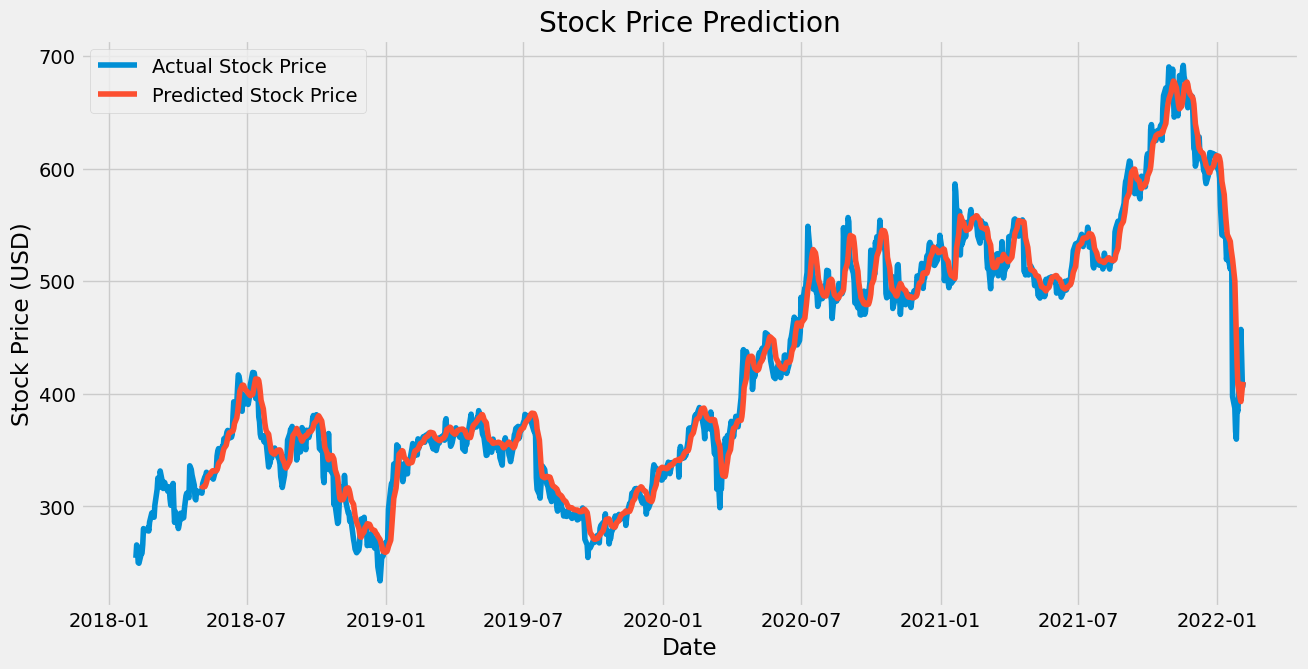

In [77]:
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual Stock Price')
plt.plot(data['Date'].iloc[60:], pred_df['Predictions'], label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

#### PENJELASAN
Garis biru menunjukkan pergerakan harga saham sebenarnya, sementara garis oranye adalah hasil prediksi model. Hal ini dapat mengetahui bagaimana tren keduanya berkorelasi. Titik-titik di sepanjang garis oranye mengindikasikan seberapa baik model dapat mereplikasi pergerakan harga sebenarnya. Semakin dekat titik-titik tersebut dengan garis biru, semakin baik prediksi model.

## Langkah 7: Kesimpulan dan Evaluasi Model 

In [78]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(data['Close'][60:], pred_df['Predictions']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 17.695416655748488


#### KESIMPULAN
* Output "Root Mean Squared Error (RMSE): 17.695416655748488" menunjukkan nilai Root Mean Squared Error (RMSE) dari model prediksi harga saham. 
* Nilai ini mengindikasikan rata-rata deviasi antara harga saham yang diprediksi oleh model dan harga saham yang sebenarnya adalah sekitar 17.70 USD. 
* RMSE sebesar 17.70 USD dapat dianggap rendah atau tinggi tergantung pada rentang harga saham. Jika harga saham cenderung memiliki fluktuasi besar, nilai RMSE ini mungkin masih dapat diterima.
* Jika prediksi harga saham digunakan untuk tujuan investasi jangka panjang, deviasi sebesar 17.70 USD mungkin dapat diterima. Namun, jika prediksi digunakan untuk tujuan perdagangan jangka pendek, nilai RMSE ini mungkin dianggap tinggi.